# Benchmark Results Visualization

Weights and log files are available clicking [at this Repository Link](https://drive.google.com/drive/folders/1MbG5ItyVQklNuFIDD1qHM6nBgvxHhuwD?usp=drive_link).

## Text models Performance, depending on Conversation Length

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

n_test_utterances = 2170

# reading logs data

class Results:
    
    def __init__(self, train_log_url, eval_log_url):

        # importing train log data
        with open(train_log_url) as f:
            lines = f.readlines()
            self.optimizer = lines[0]
            self.batch_size = int(lines[2])
            self.conv_length = int(lines[4])
            self.train_accuracy = float(lines[6])
            self.train_f1_weighted = float(lines[8])
            self.val_accuracy = float(lines[10])
            self.val_f1_weighted = float(lines[12])
            self.train_time = float(lines[14])

        # importing evalusation data
        with open(eval_log_url) as f:
            lines = f.readlines()
            self.val_f1_all = np.array(lines[1].replace('[','').replace(']','').split()).astype(float) 
            self.val_f1_macro = float(lines[3].strip())
            self.val_f1_weighted = float(lines[5].strip())
            self.test_f1_all = np.array(lines[7].replace('[','').replace(']','').split()).astype(float)
            self.test_f1_macro = float(lines[9].strip())
            self.test_f1_weighted = float(lines[11].strip())
            self.test_prediction_time = float(lines[13].strip())
    
    def __str__(self):
        return str(vars(res))

# without class weights, seed = 42

albert_results_42 = [Results(train_log_url = f'./results/seed42/text/ALBERT/logs/log_conv{i}_TextTransformer_s42.txt',
    eval_log_url=f'./results/seed42/text/ALBERT/logs/log_conv{i}_TextTransformer_s42_results.txt') for i in range(1,5)]

text_bilstm_results_42 = [Results(train_log_url = f'./results/seed42/text/BiLSTM/logs/log_conv{i}_SimpleTextModel_s42.txt',
    eval_log_url=f'./results/seed42/text/BiLSTM/logs/log_conv{i}_SimpleTextModel_s42_results.txt') for i in range(1,5)]

# without class weights, seed = 77

albert_results_77 = [Results(train_log_url = f'./results/seed77/text/ALBERT/logs/log_conv{i}_TextTransformer_s77.txt',
    eval_log_url=f'./results/seed77/text/ALBERT/logs/log_conv{i}_TextTransformer_s77_results.txt') for i in range(1,5)]

text_bilstm_results_77 = [Results(train_log_url = f'./results/seed77/text/BiLSTM/logs/log_conv{i}_SimpleTextModel_s77.txt',
    eval_log_url=f'./results/seed77/text/BiLSTM/logs/log_conv{i}_SimpleTextModel_s77_results.txt') for i in range(1,5)]

# with class weights, seed = 42, conv_len = 3

albert_results_classweight_42 = Results(train_log_url = f'./results/seed42/text/ALBERT/logs/classweight/log_conv3_TextTransformer_cw_s42.txt',
    eval_log_url=f'./results/seed42/text/ALBERT/logs/classweight/log_conv3_TextTransformer_cw_s42_results.txt') 

text_bilstm_results_classweight_42 = Results(train_log_url = f'./results/seed42/text/BiLSTM/logs/classweight/log_conv3_SimpleTextModel_cw_s42.txt',
    eval_log_url=f'./results/seed42/text/BiLSTM/logs/classweight/log_conv3_SimpleTextModel_cw_s42_results.txt')

# with class weights, seed = 77, conv_len = 3

albert_results_classweight_77 = Results(train_log_url = f'./results/seed77/text/ALBERT/logs/classweight/log_conv3_TextTransformer_cw_s77.txt',
    eval_log_url=f'./results/seed77/text/ALBERT/logs/classweight/log_conv3_TextTransformer_cw_s77_results.txt') 

text_bilstm_results_classweight_77 = Results(train_log_url = f'./results/seed77/text/BiLSTM/logs/classweight/log_conv3_SimpleTextModel_cw_s77.txt',
    eval_log_url=f'./results/seed77/text/BiLSTM/logs/classweight/log_conv3_SimpleTextModel_cw_s77_results.txt')


# grouped results
albert_results = [albert_results_42, albert_results_77]
albert_results_classweight = [albert_results_classweight_42, albert_results_classweight_77]
text_bilstm_results = [text_bilstm_results_42, text_bilstm_results_77]
text_bilstm_results_classweight= [text_bilstm_results_classweight_42, text_bilstm_results_classweight_77]

### F1

#### F1 by class

ALBERT F1 scores: 
 [0.37030378 0.39443712 0.33680295 0.39364638 0.15828544 0.37016216]
BiLSTM F1 scores: 
 [0.36581828 0.42815682 0.44479226 0.46449737 0.14923861 0.4688553 ]
ALBERT classweighted F1 scores: 
 [0.38309368 0.41804288 0.37270885 0.46824928 0.18276606 0.42112441]
BiLSTM classweighted F1 scores: 
 [0.37498602 0.4291015  0.45222392 0.42934504 0.16067147 0.46909654]


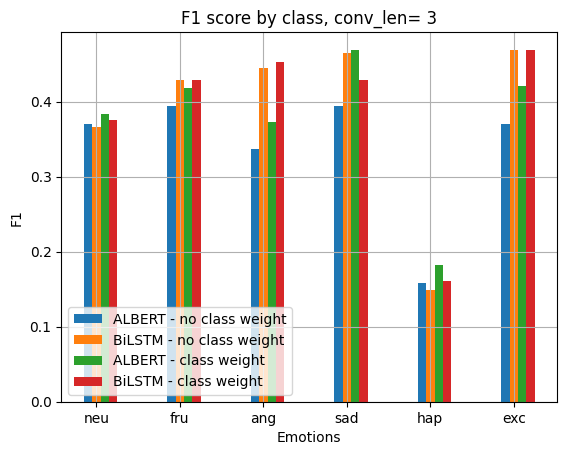

In [2]:
## f1 values by class
# are these the ones we are considering?
conv_len = 3
label2id = ['neu', 'fru', 'ang', 'sad', 'hap', 'exc']
albert_f1_byclass = np.average([ i[conv_len-1].test_f1_all[:6] for i in albert_results], axis = 0)
text_bilstm_f1_byclass = np.average([ i[conv_len-1].test_f1_all[:6] for i in text_bilstm_results], axis = 0)
albert_f1_byclass_classweight = np.average([ i.test_f1_all[:6] for i in albert_results_classweight], axis=0)
text_bilstm_f1_byclass_classweight = np.average([ i.test_f1_all[:6] for i in text_bilstm_results_classweight], axis=0) 

print('ALBERT F1 scores: \n', albert_f1_byclass)
print('BiLSTM F1 scores: \n', text_bilstm_f1_byclass)
print('ALBERT classweighted F1 scores: \n', albert_f1_byclass_classweight)
print('BiLSTM classweighted F1 scores: \n', text_bilstm_f1_byclass_classweight)

X_axis = np.arange(len(label2id))
  
plt.bar(X_axis - 0.1, albert_f1_byclass, 0.1, label = 'ALBERT - no class weight')
plt.bar(X_axis, text_bilstm_f1_byclass, 0.1, label = 'BiLSTM - no class weight')
plt.bar(X_axis + 0.1, albert_f1_byclass_classweight, 0.1, label = 'ALBERT - class weight')
plt.bar(X_axis + 0.2, text_bilstm_f1_byclass_classweight, 0.1, label = 'BiLSTM - class weight')

plt.xticks(X_axis, label2id)
plt.xlabel("Emotions")
plt.ylabel("F1")
plt.grid()
plt.title(f"F1 score by class, conv_len= {conv_len}")
plt.legend( loc='lower left')
plt.show()

To compare results between the various models, we've selected the ones built with a $conversation_{length} = 3$, this is not the conversation length for which we can obtain the best results, however, the computational resources at our disposal are limited and we were interested to do this comparison with models that we could actually pair.

ALBERT and the simple BiLSTM model are quite comparable: 
The BiLSTM model performs better than ALBERT in most of the categories: a reason for this could be found in the fact that the two models haven't been previously trained to have emotional content encoded in their weights and while BiLSTM is learning this setting starting from a random state, ALBERT does it starting from its pretrained status, that is possibly encoding different insights.
The effect of the usage of class weighting on the BiLSTM model is the improvement of the performance on the minority classes in the train set (respectively: *angry*,*sad* and *happy*), while gives a general improvement in the F1 scores of ALBERT. 

Some possibilities to improve these results could be the augmentation of the textual data for minority classes or the usage of pre-trained emotional embeddings (however, mainstream embeddings like Word2Vec and GloVe structures aren't specifically encoding Emotions).

#### F1 weighted

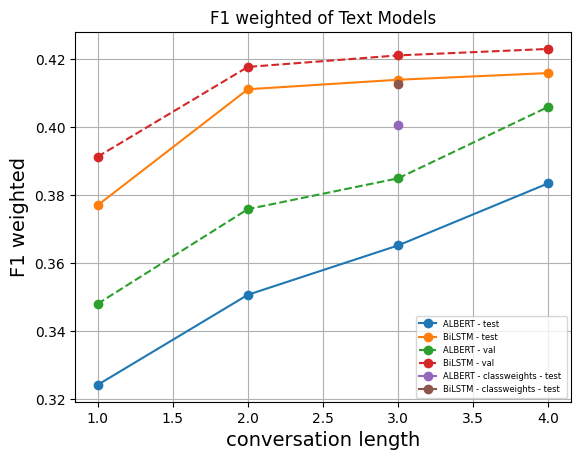

In [3]:
albert_f1_weighted_test = np.average([[i.test_f1_weighted for i in j] for j in albert_results], axis=0)
text_bilstm_f1_weighted_test = np.average([[i.test_f1_weighted for i in j] for j in text_bilstm_results], axis=0)
albert_f1_weighted_test_classweights = np.average([i.test_f1_weighted for i in albert_results_classweight], axis=0)
text_bilstm_f1_weighted_test_classweights = np.average([i.test_f1_weighted for i in text_bilstm_results_classweight], axis=0)
albert_f1_weighted_val = np.average([[i.val_f1_weighted for i in j] for j in albert_results], axis=0)
text_bilstm_f1_weighted_val = np.average([[i.val_f1_weighted for i in j] for j in text_bilstm_results], axis=0)
albert_convlen = [i.conv_length for i in albert_results[0]]

## F1 weighted depending on conversation length
plt.plot(albert_convlen, albert_f1_weighted_test, marker='o', label='ALBERT - test')
plt.plot(albert_convlen, text_bilstm_f1_weighted_test, marker='o', label='BiLSTM - test')
plt.plot(albert_convlen, albert_f1_weighted_val, linestyle='--', marker='o', label='ALBERT - val')
plt.plot(albert_convlen, text_bilstm_f1_weighted_val, linestyle='--', marker='o', label='BiLSTM - val')
plt.plot([3], albert_f1_weighted_test_classweights, marker='o', label='ALBERT - classweights - test ')
plt.plot([3], text_bilstm_f1_weighted_test_classweights, marker='o', label='BiLSTM - classweights - test')
plt.ylabel('F1 weighted', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('F1 weighted of Text Models')
plt.grid()
plt.legend(fontsize=6)
plt.show()


As we can easily notice, the scores increase with the increasing length of the conversation history, this is because conversations usually have a dominant emotion along their temporal dimension and because in IEMOCAP conversations include just two speakers (this limits the number of emotions in a). An alternative to this approach could have been considering also the future utterances (with respect to the one actually asked to classify), but we preferred to consider this problem as a classification task that has to be done on-the-fly and not a posteriori (apart from this aspect, this is not possible with the current architecture chosen for the models, that use a Time Distributed Layer). 

#### F1 macro

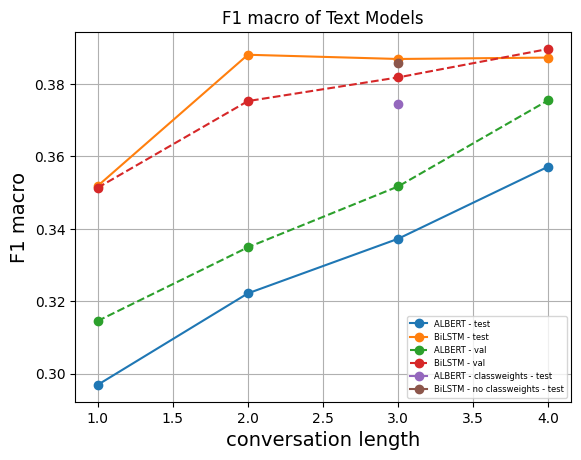

In [4]:
albert_f1_macro_test = np.average([[i.test_f1_macro for i in j] for j in albert_results], axis=0)
text_bilstm_f1_macro_test = np.average([[i.test_f1_macro for i in j] for j in text_bilstm_results], axis=0)
albert_f1_macro_test_classweights = np.average([i.test_f1_macro for i in albert_results_classweight], axis=0)
text_bilstm_f1_macro_test_classweights = np.average([i.test_f1_macro for i in text_bilstm_results_classweight], axis=0)
albert_f1_macro_val = np.average([[i.val_f1_macro for i in j] for j in albert_results], axis=0)
text_bilstm_f1_macro_val = np.average([[i.val_f1_macro for i in j] for j in text_bilstm_results], axis=0)
albert_convlen = [i.conv_length for i in albert_results[0]]

## F1 macro depending on conversation length
plt.plot(albert_convlen, albert_f1_macro_test, marker='o', label='ALBERT - test')
plt.plot(albert_convlen, text_bilstm_f1_macro_test, marker='o', label='BiLSTM - test')
plt.plot(albert_convlen, albert_f1_macro_val, linestyle='--', marker='o', label='ALBERT - val')
plt.plot(albert_convlen, text_bilstm_f1_macro_val, linestyle='--', marker='o', label='BiLSTM - val')
plt.plot([3], albert_f1_macro_test_classweights, marker='o', label='ALBERT - classweights - test ')
plt.plot([3], text_bilstm_f1_macro_test_classweights, marker='o', label='BiLSTM - no classweights - test')
plt.ylabel('F1 macro', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('F1 macro of Text Models')
plt.grid()
plt.legend(fontsize=6)
plt.show()

In this figure we can see the different results on the $F1_{macro}$ scores. For visualization purposes, we limit to show the results for the different models just for test and validation sets when not using class weights, while just for test set and for $conversation_{length} =3$ when using class weights. 

### Training Time

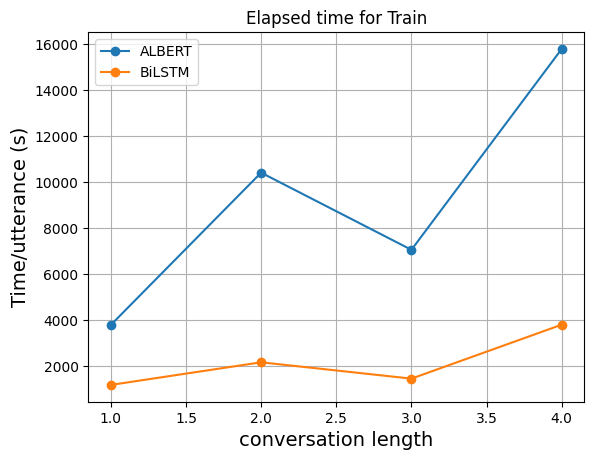

In [5]:
# train time
albert_train_time = np.average([[i.train_time for i in j] for j in albert_results], axis=0)
text_bilstm_train_time = np.average([[i.train_time for i in j] for j in text_bilstm_results], axis=0)

albert_results_convlen = [i.conv_length for i in albert_results[0]]

## Elapsed time (s) depending on conversation length

plt.plot(albert_results_convlen, albert_train_time, linestyle='-', marker='o', label='ALBERT')
plt.plot(albert_results_convlen, text_bilstm_train_time, linestyle='-', marker='o', label='BiLSTM')
plt.ylabel('Time/utterance (s)', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Elapsed time for Train')
plt.grid()
plt.legend()
plt.show()


Since the amount of data to be processed at each step increases (conversation length being a multiplying constant of this value), also the training time generally increases and the amount of resources follows the same fashion (in our case, we've preprocessed the whole dataset in the local RAM, so even the memory availability became a bottleneck for our training process. This effect can be mitigated by libraries that allow to preprocess (and also eventually load) the input data just at training time, creating batches one-by-one and storing in RAM just the current one). 

### Inference Time

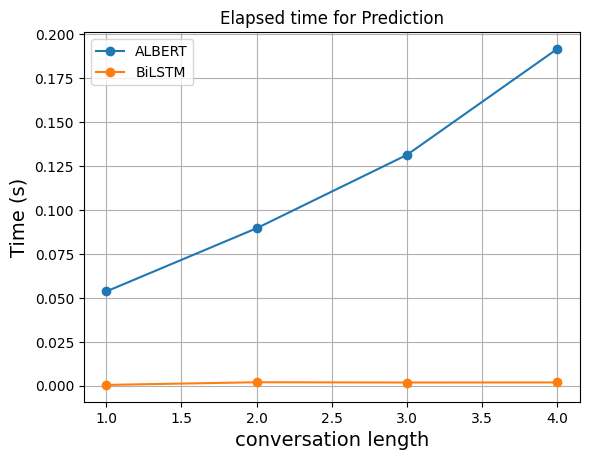

In [6]:
# prediction time
albert_eval_time = np.average([[i.test_prediction_time for i in j] for j in albert_results], axis=0) / n_test_utterances
text_bilstm_eval_time = np.average([[i.test_prediction_time for i in j] for j in text_bilstm_results], axis=0) / n_test_utterances

plt.plot(albert_results_convlen, albert_eval_time, marker='o', label='ALBERT')
plt.plot(albert_results_convlen, text_bilstm_eval_time, marker='o', label='BiLSTM')
plt.ylabel('Time (s)', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Elapsed time for Prediction')
plt.grid()
plt.legend()
plt.show()

Since ALBERT structure is way more complex than the BiLSTM, the time required for prediction is (not surprisingly) much higher (the input data has to undergo many more computations) and is increasing with conversation length, since more data are passed into the model.

## Audio models Performance, depending on Conversation Length

For the audio models we've decided do test a Transformer-based model against simple stats-based model for audio (MFCC, MEL, Chroma). Notice that, due to resources limitations, we've been able to train and test Wav2Vec on audios up to certain durations, respectively:
 - quantile 0.05: 1 sec.
 - quantie 0.1: 2 sec.
 - quantile 0.25: 3 sec.
 - quantile 0.5: 4 sec.

While for the simple models we were able to consider the whole audio tracks.

### F1

#### F1 by class

Wav2VEC F1 scores: 
 [0.29253685 0.32489566 0.38100242 0.37644767 0.10807522 0.36264632]
MFCC F1 scores: 
 [0.22770881 0.25584879 0.22032068 0.37526408 0.0381356  0.29473434]
MEL F1 scores: 
 [0.11964735 0.32106137 0.10526316 0.2369281  0.         0.08695652]
Chroma F1 scores: 
 [0.24290211 0.25765083 0.2188158  0.42120077 0.0405396  0.19748346]
Wav2VEC classweighted F1 scores: 
 [0.30584474 0.2642738  0.38760514 0.39737635 0.11441772 0.37601674]
MFCC classweighted F1 scores: 
 [0.09762113 0.24742568 0.1729618  0.17339668 0.06138373 0.21229253]
MEL classweighted F1 scores: 
 [0.11796247 0.27304794 0.10873441 0.2218845  0.03846154 0.13732005]
Chroma classweighted F1 scores: 
 [0.15171392 0.29409669 0.16175287 0.36666679 0.         0.33318854]


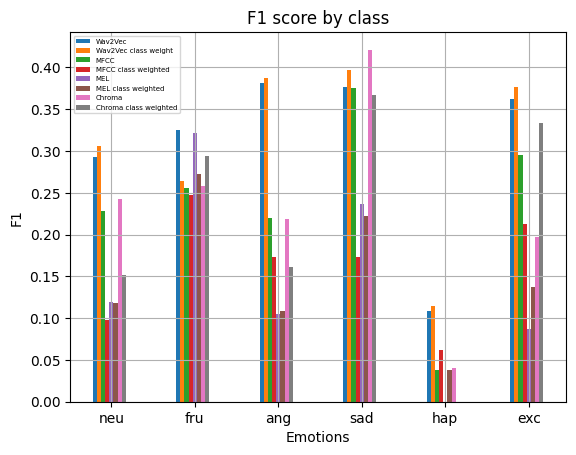

In [7]:
# results with class weights, seed=42
wav2vec_results_42 = [Results(train_log_url = f'./results/seed42/audio/Wav2Vec/quantile_0.1/log_conv{i}_AudioTransformer_s42.txt',
    eval_log_url=f'./results/seed42/audio/Wav2Vec/quantile_0.1/log_conv{i}_AudioTransformer_s42_results.txt') for i in range(1,4)]

mfcc_results_42 = [Results(train_log_url = f'./results/seed42/audio/LiteModel/mfcc/log/log_conv{i}_SimpleAudioModel_mfcc_s42.txt',
    eval_log_url=f'./results/seed42/audio/LiteModel/mfcc/log/log_conv{i}_SimpleAudioModel_mfcc_s42_results.txt') for i in range(1,4)]

mel_results_42 = [Results(train_log_url = f'./results/seed42/audio/LiteModel/mel/log/log_conv{i}_SimpleAudioModel_mel_s42.txt',
    eval_log_url=f'./results/seed42/audio/LiteModel/mel/log/log_conv{i}_SimpleAudioModel_mel_s42_results.txt') for i in range(1,4)]

chroma_results_42 = [Results(train_log_url = f'./results/seed42/audio/LiteModel/chroma/log/log_conv{i}_SimpleAudioModel_chroma_s42.txt',
    eval_log_url=f'./results/seed42/audio/LiteModel/chroma/log/log_conv{i}_SimpleAudioModel_chroma_s42_results.txt') for i in range(1,4)]

# results with class weights and conv_length=3, seed=42
wav2vec_results_weighted_42 = Results(train_log_url = f'./results/seed42/audio/Wav2Vec/quantile_0.1/classweight/log_conv3_AudioTransformer_cw_s42.txt',
    eval_log_url=f'./results/seed42/audio/Wav2Vec/quantile_0.1/classweight/log_conv3_AudioTransformer_cw_s42_results.txt')

mfcc_results_weighted_42 = Results(train_log_url = f'./results/seed42/audio/LiteModel/mfcc/log/classweight/log_conv3_SimpleAudioModel_mfcc_cw_s42.txt',
    eval_log_url=f'./results/seed42/audio/LiteModel/mfcc/log/classweight/log_conv3_SimpleAudioModel_mfcc_cw_s42_results.txt')

mel_results_weighted_42 = Results(train_log_url = f'./results/seed42/audio/LiteModel/mel/log/classweight/log_conv3_SimpleAudioModel_mel_cw_s42.txt',
    eval_log_url=f'./results/seed42/audio/LiteModel/mel/log/classweight/log_conv3_SimpleAudioModel_mel_cw_s42_results.txt')

chroma_results_weighted_42 = Results(train_log_url = f'./results/seed42/audio/LiteModel/chroma/log/classweight/log_conv3_SimpleAudioModel_chroma_cw_s42.txt',
    eval_log_url=f'./results/seed42/audio/LiteModel/chroma/log/classweight/log_conv3_SimpleAudioModel_chroma_cw_s42_results.txt')


# results with class weights, seed=77
wav2vec_results_77 = [Results(train_log_url = f'./results/seed77/audio/Wav2Vec/quantile_0.1/log_conv{i}_AudioTransformer_s77.txt',
    eval_log_url=f'./results/seed77/audio/Wav2Vec/quantile_0.1/log_conv{i}_AudioTransformer_s77_results.txt') for i in range(1,4)]

mfcc_results_77 = [Results(train_log_url = f'./results/seed77/audio/LiteModel/mfcc/log/log_conv{i}_SimpleAudioModel_mfcc_s77.txt',
    eval_log_url=f'./results/seed77/audio/LiteModel/mfcc/log/log_conv{i}_SimpleAudioModel_mfcc_s77_results.txt') for i in range(1,4)]

mel_results_77 = [Results(train_log_url = f'./results/seed77/audio/LiteModel/mel/log/log_conv{i}_SimpleAudioModel_mel_s77.txt',
    eval_log_url=f'./results/seed77/audio/LiteModel/mel/log/log_conv{i}_SimpleAudioModel_mel_s77_results.txt') for i in range(1,4)]

chroma_results_77 = [Results(train_log_url = f'./results/seed77/audio/LiteModel/chroma/log/log_conv{i}_SimpleAudioModel_chroma_s77.txt',
    eval_log_url=f'./results/seed77/audio/LiteModel/chroma/log/log_conv{i}_SimpleAudioModel_chroma_s77_results.txt') for i in range(1,4)]

# results with class weights and conv_length=3, seed=77

wav2vec_results_weighted_77 = Results(train_log_url = f'./results/seed77/audio/Wav2Vec/quantile_0.1/classweight/log_conv3_AudioTransformer_cw_s77.txt',
    eval_log_url=f'./results/seed77/audio/Wav2Vec/quantile_0.1/classweight/log_conv3_AudioTransformer_cw_s77_results.txt')

mfcc_results_weighted_77 = Results(train_log_url = f'./results/seed77/audio/LiteModel/mfcc/log/classweight/log_conv3_SimpleAudioModel_mfcc_cw_s77.txt',
    eval_log_url=f'./results/seed77/audio/LiteModel/mfcc/log/classweight/log_conv3_SimpleAudioModel_mfcc_cw_s77_results.txt')

mel_results_weighted_77 = Results(train_log_url = f'./results/seed77/audio/LiteModel/mel/log/classweight/log_conv3_SimpleAudioModel_mel_cw_s77.txt',
    eval_log_url=f'./results/seed77/audio/LiteModel/mel/log/classweight/log_conv3_SimpleAudioModel_mel_cw_s77_results.txt')

chroma_results_weighted_77 = Results(train_log_url = f'./results/seed77/audio/LiteModel/chroma/log/classweight/log_conv3_SimpleAudioModel_chroma_cw_s77.txt',
    eval_log_url=f'./results/seed77/audio/LiteModel/chroma/log/classweight/log_conv3_SimpleAudioModel_chroma_cw_s77_results.txt')

wav2vec_results = [wav2vec_results_42, wav2vec_results_77]
mfcc_results = [mfcc_results_42, mfcc_results_77]
mel_results = [mel_results_42, mel_results_77] 
chroma_results = [chroma_results_42, chroma_results_77]

wav2vec_results_weighted = [wav2vec_results_weighted_42, wav2vec_results_weighted_77]
mfcc_results_weighted = [mfcc_results_weighted_42, mfcc_results_weighted_77]
mel_results_weighted = [mel_results_weighted_42, mel_results_weighted_77] 
chroma_results_weighted = [chroma_results_weighted_42, chroma_results_weighted_77]

label2id = ['neu', 'fru', 'ang', 'sad', 'hap', 'exc']

wav2vec_f1_byclass = np.average([i[2].test_f1_all[:6] for i in wav2vec_results], axis=0)
mfcc_f1_byclass = np.average([i[2].test_f1_all[:6] for i in mfcc_results], axis=0)
mel_f1_byclass = np.average([i[2].test_f1_all[:6] for i in mel_results], axis=0)
chroma_f1_byclass = np.average([i[2].test_f1_all[:6] for i in chroma_results], axis=0)

# class weighted model results

wav2vec_f1_byclass_weighted = np.average([i.test_f1_all[:6] for i in wav2vec_results_weighted], axis=0)
mfcc_f1_byclass_weighted = np.average([i.test_f1_all[:6] for i in mfcc_results_weighted], axis=0)
mel_f1_byclass_weighted = np.average([i.test_f1_all[:6] for i in mel_results_weighted], axis=0)
chroma_f1_byclass_weighted = np.average([i.test_f1_all[:6] for i in chroma_results_weighted], axis=0)

print('Wav2VEC F1 scores: \n', wav2vec_f1_byclass)
print('MFCC F1 scores: \n', mfcc_f1_byclass)
print('MEL F1 scores: \n', mel_f1_byclass)
print('Chroma F1 scores: \n', chroma_f1_byclass)
print('Wav2VEC classweighted F1 scores: \n', wav2vec_f1_byclass_weighted)
print('MFCC classweighted F1 scores: \n', mfcc_f1_byclass_weighted)
print('MEL classweighted F1 scores: \n', mel_f1_byclass_weighted)
print('Chroma classweighted F1 scores: \n', chroma_f1_byclass_weighted)


X_axis = np.arange(len(label2id))
  
plt.bar(X_axis - 0.20, wav2vec_f1_byclass, 0.05, label = 'Wav2Vec')
plt.bar(X_axis - 0.15, wav2vec_f1_byclass_weighted, 0.05, label = 'Wav2Vec class weight')
plt.bar(X_axis - 0.10, mfcc_f1_byclass, 0.05, label = 'MFCC')
plt.bar(X_axis - 0.05, mfcc_f1_byclass_weighted, 0.05, label = 'MFCC class weighted')
plt.bar(X_axis, mel_f1_byclass, 0.05, label = 'MEL')
plt.bar(X_axis + 0.05, mel_f1_byclass_weighted, 0.05, label = 'MEL class weighted')
plt.bar(X_axis + 0.10, chroma_f1_byclass, 0.05, label = 'Chroma')
plt.bar(X_axis + 0.15, chroma_f1_byclass_weighted, 0.05, label = 'Chroma class weighted')


  
plt.xticks(X_axis, label2id)
plt.xlabel("Emotions")
plt.ylabel("F1")
plt.grid()
plt.title("F1 score by class")
plt.legend(fontsize=5)
plt.show()

With respect to the text models, audio models have generally lower scores. The effect of class weighting is similar to the one seen for text models: for the simple lightweight models can improve performance on certain minority classes but can also worsen performance on majority classes, while for Wav2Vec gives a general improvement. The *happy* class seems, even in this case, being the worst predicted class, while for the *excited class*, Wav2Vec seems capturing interesting insights.

#### F1 Weighted

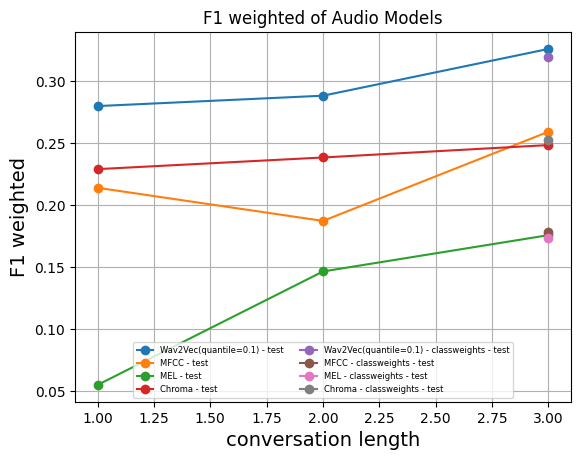

In [13]:
wav2vec_convlen = [i.conv_length for i in wav2vec_results[0]]
wav2vec_f1_weighted_test = np.average([[i.test_f1_weighted for i in j] for j in wav2vec_results], axis=0)
mfcc_f1_weighted_test = np.average([[i.test_f1_weighted for i in j] for j in mfcc_results], axis=0)
mel_f1_weighted_test = np.average([[i.test_f1_weighted for i in j] for j in mel_results], axis=0)
chroma_f1_weighted_test = np.average([[i.test_f1_weighted for i in j] for j in chroma_results], axis=0)

# class weight results f1-weighted
wav2vec_f1_weighted_test_classweight = np.average([i.test_f1_weighted for i in wav2vec_results_weighted], axis=0)
mfcc_f1_weighted_test_classweight = np.average([i.test_f1_weighted for i in mfcc_results_weighted], axis=0)
mel_f1_weighted_test_classweight = np.average([i.test_f1_weighted for i in mel_results_weighted], axis=0)
chroma_f1_weighted_test_classweight = np.average([i.test_f1_weighted for i in chroma_results_weighted], axis=0)


plt.plot(wav2vec_convlen, wav2vec_f1_weighted_test, marker='o', label='Wav2Vec(quantile=0.1) - test')
plt.plot(wav2vec_convlen, mfcc_f1_weighted_test, marker='o', label='MFCC - test')
plt.plot(wav2vec_convlen, mel_f1_weighted_test, marker='o', label='MEL - test')
plt.plot(wav2vec_convlen, chroma_f1_weighted_test, marker='o', label='Chroma - test')

# adding experiments with class weighting, conv_len=3
plt.plot([3], wav2vec_f1_weighted_test_classweight, marker='o', label='Wav2Vec(quantile=0.1) - classweights - test')
plt.plot([3], mfcc_f1_weighted_test_classweight, marker='o', label='MFCC - classweights - test')
plt.plot([3], mel_f1_weighted_test_classweight, marker='o', label='MEL - classweights - test')
plt.plot([3], chroma_f1_weighted_test_classweight, marker='o', label='Chroma - classweights - test')

plt.ylabel('F1 weighted', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('F1 weighted of Audio Models')
plt.grid()
plt.legend(fontsize=6,ncols=2, loc='lower center')
plt.show()

Similarly to the text models, increasing the conversation length reflects in the increase of  the F1-weighted score. Classweight seems having no overall effect on this metric.

#### F1 macro

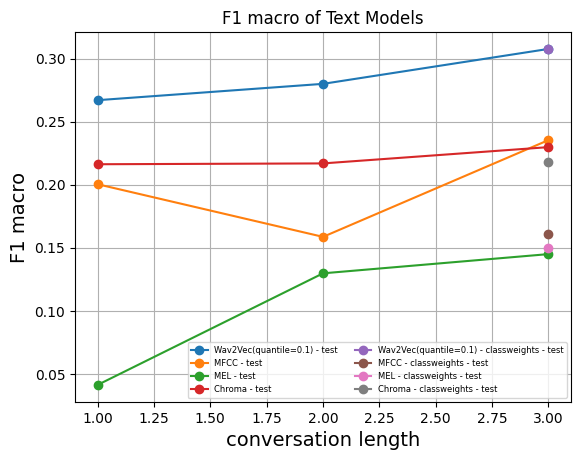

In [9]:
wav2vec_convlen = [i.conv_length for i in wav2vec_results[0]]
wav2vec_f1_macro_test = np.average([[i.test_f1_macro for i in j] for j in wav2vec_results], axis=0)
mfcc_f1_macro_test = np.average([[i.test_f1_macro for i in j] for j in mfcc_results], axis=0)
mel_f1_macro_test = np.average([[i.test_f1_macro for i in j] for j in mel_results], axis=0)
chroma_f1_macro_test = np.average([[i.test_f1_macro for i in j] for j in chroma_results], axis=0)

# class weight results f1-weighted
wav2vec_f1_macro_test_classweight = np.average([i.test_f1_macro for i in wav2vec_results_weighted], axis=0)
mfcc_f1_macro_test_classweight = np.average([i.test_f1_macro for i in mfcc_results_weighted], axis=0)
mel_f1_macro_test_classweight = np.average([i.test_f1_macro for i in mel_results_weighted], axis=0)
chroma_f1_macro_test_classweight = np.average([i.test_f1_macro for i in chroma_results_weighted], axis=0)

## F1 weighted depending on conversation length
plt.plot(wav2vec_convlen, wav2vec_f1_macro_test, marker='o', label='Wav2Vec(quantile=0.1) - test')
plt.plot(wav2vec_convlen, mfcc_f1_macro_test, marker='o', label='MFCC - test')
plt.plot(wav2vec_convlen, mel_f1_macro_test, marker='o', label='MEL - test')
plt.plot(wav2vec_convlen, chroma_f1_macro_test, marker='o', label='Chroma - test')

# adding experiments with class weighting, conv_len=3
plt.plot([3], wav2vec_f1_macro_test_classweight, marker='o', label='Wav2Vec(quantile=0.1) - classweights - test')
plt.plot([3], mfcc_f1_macro_test_classweight, marker='o', label='MFCC - classweights - test')
plt.plot([3], mel_f1_macro_test_classweight, marker='o', label='MEL - classweights - test')
plt.plot([3], chroma_f1_macro_test_classweight, marker='o', label='Chroma - classweights - test')


plt.ylabel('F1 macro', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('F1 macro of Text Models')
plt.grid()
plt.legend(fontsize=6,ncols=2)
plt.show()

In this figure we can see the different results on the $F1_{macro}$ scores. For visualization purposes, we limit to show the results for the different models just for test and validation sets when not using class weights, while just for test set and for $conversation_{length} =3$ when using class weights. 

### Training Time

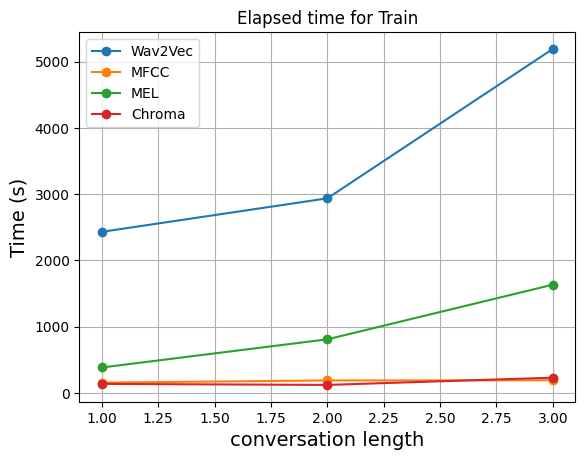

In [10]:
# train time
wav2vec_train_time = np.average([[i.train_time for i in j] for j in wav2vec_results], axis=0)
mfcc_train_time = np.average([[i.train_time for i in j] for j in mfcc_results], axis=0)
mel_train_time = np.average([[i.train_time for i in j] for j in mel_results], axis=0)
chroma_train_time = np.average([[i.train_time for i in j] for j in chroma_results], axis=0)

wav2vec_convlen = [i.conv_length for i in wav2vec_results[0]]
## Elapsed time (s) depending on conversation length

plt.plot(wav2vec_convlen, wav2vec_train_time, marker='o', label='Wav2Vec')
plt.plot(wav2vec_convlen, mfcc_train_time, marker='o', label='MFCC')
plt.plot(wav2vec_convlen, mel_train_time, marker='o', label='MEL')
plt.plot(wav2vec_convlen, chroma_train_time, marker='o', label='Chroma')

plt.ylabel('Time (s)', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Elapsed time for Train')
plt.grid()
plt.legend()
plt.show()

### Inference Time

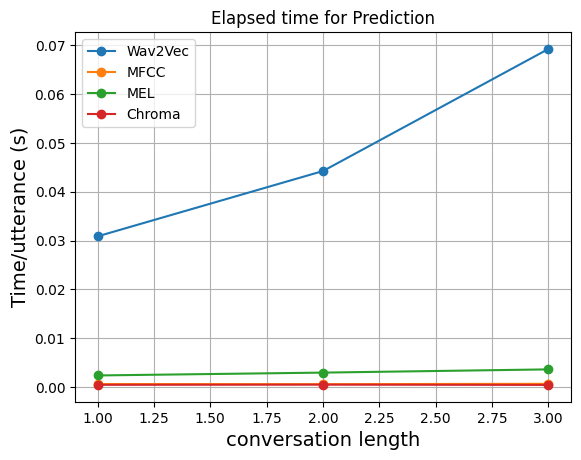

In [11]:
# train time
wav2vec_pred_time = np.average([[i.test_prediction_time for i in j] for j in wav2vec_results], axis=0) / n_test_utterances
mfcc_pred_time = np.average([[i.test_prediction_time for i in j] for j in mfcc_results], axis=0) / n_test_utterances
mel_pred_time = np.average([[i.test_prediction_time for i in j] for j in mel_results], axis=0) / n_test_utterances
chroma_pred_time = np.average([[i.test_prediction_time for i in j] for j in chroma_results], axis=0) / n_test_utterances

wav2vec_convlen = [i.conv_length for i in wav2vec_results[0]]
## Elapsed time (s) depending on conversation length

plt.plot(wav2vec_convlen, wav2vec_pred_time, marker='o', label='Wav2Vec')
plt.plot(wav2vec_convlen, mfcc_pred_time, marker='o', label='MFCC')
plt.plot(wav2vec_convlen, mel_pred_time, marker='o', label='MEL')
plt.plot(wav2vec_convlen, chroma_pred_time, marker='o', label='Chroma')

plt.ylabel('Time/utterance (s)', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Elapsed time for Prediction')
plt.grid()
plt.legend()
plt.show()

The same considerations done for the Text models hold even for these Audio models. In this case the computationals constraints are even tighter, since every second of every audio corresponds to 16000 samples (because of the audio track frequency being 16 KHz). Even in this case, the solution could be to use lazy-loading techniques or consider each sample as a collection of its fragments having the same emotion (for example, a 4 seconds audio can be cut in 4 fragments of 1 seconds, which would have the same label).

### Wav2Vec Performance, depending on quantile

In [12]:
quantiles = [0.005,0.1,0.25,0.5]
wav2vec_results_quantiles_42 = [Results(train_log_url = f'./results/seed42/audio/Wav2Vec/quantile_{i}/log_conv1_AudioTransformer_s42.txt',
    eval_log_url=f'./results/seed42/audio/Wav2Vec/quantile_{i}/log_conv1_AudioTransformer_s42_results.txt') for i in quantiles]

wav2vec_results_quantiles_77 = [Results(train_log_url = f'./results/seed77/audio/Wav2Vec/quantile_{i}/log_conv1_AudioTransformer_s77.txt',
    eval_log_url=f'./results/seed77/audio/Wav2Vec/quantile_{i}/log_conv1_AudioTransformer_s77_results.txt') for i in quantiles]

wav2vec_results_quantiles = [wav2vec_results_quantiles_42, wav2vec_results_quantiles_77]

wav2vec_results_quantiles_f1_test = np.average([[i.test_f1_weighted  for i in j] for j in wav2vec_results_quantiles], axis=0)
wav2vec_results_quantiles_f1 = np.average([[i.test_f1_weighted  for i in j] for j in wav2vec_results_quantiles], axis=0)

plt.plot(quantiles, wav2vec_results_quantiles_f1, marker='o', label='Wav2Vec')

plt.ylabel('F1-weighted', fontsize=14)
plt.xlabel('quantile', fontsize=14)
plt.title('F1 weighted (conv_length=1)')
plt.grid()
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './results/seed77/audio/Wav2Vec/quantile_0.5/log_conv1_AudioTransformer_s77.txt'

As expectable, the more we consider of each audio, the better the performance. Of course, one could randomically choose the starting time of the fragment of the track. To simplify our experiments we've decided to take the fragment starting from the actuala beginning of each track. 

## Bimodal models (Text BiLSTM + Wav2Vec) Performance
The bimodal model that we've chosen has the previously tested BiLSTM for the text input, paired to Wav2Vec for the modal input: this choice was done because these were the best models on the single modalitysince the experiments are expensive (both in term of computational resources and in terms of time), we trained and tested this configuration under a selected set of parameters, obtaining the results displayed in Table .

### Fusion method

We've tried different fusion methods to understand on an empirical level what could be the best one among:
- addition
- concatenation
- cross-attention

Paired with
- class weighting
- no class weighting

### F1

#### F1 by class

In [ ]:
conv_len = 3
label2id = ['neu', 'fru', 'ang', 'sad', 'hap', 'exc']
X_axis = np.arange(len(label2id))

bimodal_add_42 = Results(train_log_url = f'./results/seed42/bimodal/no_classweight/addition/log_conv3_add_AudioTransformer_SimpleTextModel_s42.txt',
                    eval_log_url=f'./results/seed42/bimodal/no_classweight/addition/log_conv3_add_AudioTransformer_SimpleTextModel_s42_results.txt')

bimodal_concat_42 = Results(train_log_url = f'./results/seed42/bimodal/no_classweight/concatenation/log_conv3_concatenate_AudioTransformer_SimpleTextModel_s42.txt',
                    eval_log_url=f'./results/seed42/bimodal/no_classweight/concatenation/log_conv3_concatenate_AudioTransformer_SimpleTextModel_s42_results.txt')

bimodal_crossatt_42 = Results(train_log_url = f'./results/seed42/bimodal/no_classweight/crossattention/log_conv3_attention_AudioTransformer_SimpleTextModel_s42.txt',
                    eval_log_url=f'./results/seed42/bimodal/no_classweight/crossattention/log_conv3_attention_AudioTransformer_SimpleTextModel_s42_results.txt')

bimodal_add_classweight_42 = Results(train_log_url = f'./results/seed42/bimodal/classweight/addition/log_conv3_add_AudioTransformer_SimpleTextModel_cw_s42.txt',
                    eval_log_url=f'./results/seed42/bimodal/classweight/addition/log_conv3_add_AudioTransformer_SimpleTextModel_cw_s42_results.txt')

bimodal_concat_classweight_42 = Results(train_log_url = f'./results/seed42/bimodal/classweight/concatenation/log_conv3_concatenate_AudioTransformer_SimpleTextModel_cw_s42.txt',
                    eval_log_url=f'./results/seed42/bimodal/classweight/concatenation/log_conv3_concatenate_AudioTransformer_SimpleTextModel_cw_s42_results.txt')

bimodal_crossatt_classweight_42 = Results(train_log_url = f'./results/seed42/bimodal/classweight/crossattention/log_conv3_attention_AudioTransformer_SimpleTextModel_cw_s42.txt',
                    eval_log_url=f'./results/seed42/bimodal/classweight/crossattention/log_conv3_attention_AudioTransformer_SimpleTextModel_cw_s42_results.txt')

bimodal_add_77 = Results(train_log_url = f'./results/seed77/bimodal/no_classweight/addition/log_conv3_add_AudioTransformer_SimpleTextModel_s77.txt',
                    eval_log_url=f'./results/seed77/bimodal/no_classweight/addition/log_conv3_add_AudioTransformer_SimpleTextModel_s77_results.txt')

bimodal_concat_77 = Results(train_log_url = f'./results/seed77/bimodal/no_classweight/concatenation/log_conv3_concatenate_AudioTransformer_SimpleTextModel_s77.txt',
                    eval_log_url=f'./results/seed77/bimodal/no_classweight/concatenation/log_conv3_concatenate_AudioTransformer_SimpleTextModel_s77_results.txt')

bimodal_crossatt_77 = Results(train_log_url = f'./results/seed77/bimodal/no_classweight/crossattention/log_conv3_attention_AudioTransformer_SimpleTextModel_s77.txt',
                    eval_log_url=f'./results/seed77/bimodal/no_classweight/crossattention/log_conv3_attention_AudioTransformer_SimpleTextModel_s77_results.txt')

bimodal_add_classweight_77 = Results(train_log_url = f'./results/seed77/bimodal/classweight/addition/log_conv3_add_AudioTransformer_SimpleTextModel_cw_s77.txt',
                    eval_log_url=f'./results/seed77/bimodal/classweight/addition/log_conv3_add_AudioTransformer_SimpleTextModel_cw_s77_results.txt')

bimodal_concat_classweight_77 = Results(train_log_url = f'./results/seed77/bimodal/classweight/concatenation/log_conv3_concatenate_AudioTransformer_SimpleTextModel_cw_s77.txt',
                    eval_log_url=f'./results/seed77/bimodal/classweight/concatenation/log_conv3_concatenate_AudioTransformer_SimpleTextModel_cw_s77_results.txt')

bimodal_crossatt_classweight_77 = Results(train_log_url = f'./results/seed77/bimodal/classweight/crossattention/log_conv3_attention_AudioTransformer_SimpleTextModel_cw_s77.txt',
                    eval_log_url=f'./results/seed77/bimodal/classweight/crossattention/log_conv3_attention_AudioTransformer_SimpleTextModel_cw_s77_results.txt')


bimodal_add = [bimodal_add_42, bimodal_add_77]
bimodal_concat = [bimodal_concat_42, bimodal_concat_77]
bimodal_crossatt = [bimodal_crossatt_42, bimodal_crossatt_77]
bimodal_add_classweight = [bimodal_add_classweight_42, bimodal_add_classweight_77]
bimodal_concat_classweight = [bimodal_concat_classweight_42, bimodal_concat_classweight_77]
bimodal_crossatt_classweight = [bimodal_crossatt_classweight_42, bimodal_crossatt_classweight_77]


# averaging f1s
bimodal_add_f1_byclass = np.average([i.test_f1_all[:6] for i in bimodal_add], axis=0)
bimodal_concat_f1_byclass = np.average([i.test_f1_all[:6] for i in bimodal_concat], axis=0)
bimodal_crossatt_f1_byclass = np.average([i.test_f1_all[:6] for i in bimodal_crossatt], axis=0)
bimodal_add_classweight_f1_byclass = np.average([i.test_f1_all[:6] for i in bimodal_add_classweight], axis=0)
bimodal_concat_classweight_f1_byclass = np.average([i.test_f1_all[:6] for i in bimodal_concat_classweight], axis=0)
bimodal_crossatt_classweight_f1_byclass = np.average([i.test_f1_all[:6] for i in bimodal_crossatt_classweight], axis=0)

print('Addition: \n', bimodal_add_f1_byclass)
print('Addition: (classweighting) \n', bimodal_add_classweight_f1_byclass)
print('Concatenation: \n', bimodal_concat_f1_byclass)
print('Concatenation: (classweighting) \n', bimodal_concat_classweight_f1_byclass)
print('Cross-Attention: \n', bimodal_crossatt_f1_byclass)
print('Cross-Attention: (classweighting)\n', bimodal_crossatt_classweight_f1_byclass)


plt.bar(X_axis - 0.20, text_bilstm_f1_byclass, 0.05, label = 'Text only - BiLSTM (no class weight)')
plt.bar(X_axis - 0.15, bimodal_add_f1_byclass, 0.05, label = 'Addition')
plt.bar(X_axis - 0.10, bimodal_add_classweight_f1_byclass, 0.05, label = 'Addition - classweight')
plt.bar(X_axis - 0.05, bimodal_concat_f1_byclass, 0.05, label = 'Concatenation')
plt.bar(X_axis, bimodal_concat_classweight_f1_byclass, 0.05, label = 'Concatenation - classweight')
plt.bar(X_axis + 0.05, bimodal_crossatt_f1_byclass, 0.05, label = 'Cross Attention')
plt.bar(X_axis + 0.10, bimodal_crossatt_classweight_f1_byclass, 0.05, label = 'Cross Attention - classweight')
plt.bar(X_axis + 0.15, wav2vec_f1_byclass, 0.05, label = 'Audio only - Wav2Vec (no class weight)')

plt.xticks(X_axis, label2id)
plt.xlabel("Emotions")
plt.ylabel("F1")
plt.title("Bi-Modal (Text BiLSTM + Wav2Vec ) F1 score by class by kinds of fusion")
plt.grid()
plt.legend(fontsize=5)
plt.show()

*Addition* and *Concatenation* resulted being the methods giving the best performances, combining the advantages of both of the models. *Cross Attention* has instead resulted in being the least effective fusion method, probably leading to a sort of 'confusion' that causes the model to have lower performances (similar to using Wav2Vec only).

The bimodal model has been able to give scores higher than the ones obtained with the single modalities (text only or audio only), however, even if better scores were obtained, model doesn't seem completely able to capture the aspects that should be captured just from the mixed modalities (a concept know in art as 'synesthesia'). For this reason, a possible improvement could be to consider custom fusion models as the one presented by \cite{}. 

#### F1 weighted

In [ ]:
bimodal_add_f1_weighted = np.average([i.test_f1_weighted for i in bimodal_add], axis=0)
bimodal_concat_f1_weighted = np.average([i.test_f1_weighted for i in bimodal_concat], axis=0)
bimodal_crossatt_f1_weighted = np.average([i.test_f1_weighted for i in bimodal_crossatt], axis=0)
bimodal_add_classweight_f1_weighted = np.average([i.test_f1_weighted for i in bimodal_add_classweight], axis=0)
bimodal_concat_classweight_f1_weighted = np.average([i.test_f1_weighted for i in bimodal_concat_classweight], axis=0)
bimodal_crossatt_classweight_f1_weighted = np.average([i.test_f1_weighted for i in bimodal_crossatt_classweight], axis=0)


# PLOT

fig, ax = plt.subplots()

x = ['addition', 'concat.', 'cross\natt.', 'addition \nclass w.','concat. \nclass w.', 'cross-\natt\nclass w.', 'Audio \n Only \n Wav2Vec \nquantile\n0.1','Text\nOnly\nBiLSTM']
y = [bimodal_add_f1_weighted, bimodal_concat_f1_weighted, bimodal_crossatt_f1_weighted, bimodal_add_classweight_f1_weighted, bimodal_concat_classweight_f1_weighted, bimodal_crossatt_classweight_f1_weighted, wav2vec_f1_weighted_test[2], text_bilstm_f1_weighted_test[2]]

bar_colors = ['tab:red', 'tab:blue', 'c', 'orange', 'tab:olive', 'tab:brown', 'tab:pink', 'tab:purple']

rect = ax.bar(x, y, label=y, color=bar_colors)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(np.round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rect)

ax.set_ylabel('F1-weighted')
ax.set_title('F1-weighted on Test Set, conv_len = 3')

plt.show()

Addition and concatenation have similar scores both in F1-avg and F1-macro.

#### F1 macro

In [ ]:
bimodal_add_f1_macro = np.average([i.test_f1_macro for i in bimodal_add], axis=0)
bimodal_concat_f1_macro = np.average([i.test_f1_macro for i in bimodal_concat], axis=0)
bimodal_crossatt_f1_macro = np.average([i.test_f1_macro for i in bimodal_crossatt], axis=0)
bimodal_add_classweight_f1_macro = np.average([i.test_f1_macro for i in bimodal_add_classweight], axis=0)
bimodal_concat_classweight_f1_macro = np.average([i.test_f1_macro for i in bimodal_concat_classweight], axis=0)
bimodal_crossatt_classweight_f1_macro = np.average([i.test_f1_macro for i in bimodal_crossatt_classweight], axis=0)

# PLOT


fig, ax = plt.subplots()

x = ['addition', 'concat.', 'cross-\nattention', 'addition \nclass w.','concat. \n - class w.', 'cross-\nattention \nclass w.', 'Audio \n Only \n Wav2Vec \nquantile\n0.1','Text\nOnly\nBiLSTM']
y = [bimodal_add_f1_macro, bimodal_concat_f1_macro, bimodal_crossatt_f1_macro, bimodal_add_classweight_f1_macro, bimodal_concat_classweight_f1_macro, bimodal_crossatt_classweight_f1_macro, wav2vec_f1_macro_test[2], text_bilstm_f1_macro_test[2]]

bar_colors = ['tab:red', 'tab:blue', 'c', 'orange', 'tab:olive', 'tab:brown', 'tab:pink', 'tab:purple']

rect = ax.bar(x, y, label=y, color=bar_colors)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(np.round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rect)

ax.set_ylabel('F1-macro')
ax.set_title('F1-macro on Test Set, conv_len = 3')
#ax.legend(title='Fruit color')

plt.show()

#### Training Time

In [ ]:
bimodal_add_train_time = np.average([i.train_time for i in bimodal_add], axis=0)
bimodal_concat_train_time = np.average([i.train_time for i in bimodal_concat], axis=0)
bimodal_crossatt_train_time = np.average([i.train_time for i in bimodal_crossatt], axis=0)
bimodal_add_classweight_train_time = np.average([i.train_time for i in bimodal_add_classweight], axis=0)
bimodal_concat_classweight_train_time = np.average([i.train_time for i in bimodal_concat_classweight], axis=0)
bimodal_crossatt_classweight_train_time = np.average([i.train_time for i in bimodal_crossatt_classweight], axis=0)

# PLOT


fig, ax = plt.subplots()

x = ['addition', 'concat.', 'cross-\nattention', 'addition \nclass w.','concat. \n - class w.', 'cross-\nattention \nclass w.']# 'Audio \n Only \n Wav2Vec \nquantile\n0.1','Text\nOnly\nBiLSTM']
y = [bimodal_add_train_time, bimodal_concat_train_time, bimodal_crossatt_train_time, bimodal_add_classweight_train_time, bimodal_concat_classweight_train_time, bimodal_crossatt_classweight_train_time] #wav2vec_train_time[2], text_bilstm_train_time[2]]

bar_colors = ['tab:red', 'tab:blue', 'c', 'orange', 'tab:olive', 'tab:brown'] #'tab:pink', 'tab:purple']

rect = ax.bar(x, y, label=y, color=bar_colors)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(np.round(height,1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rect)

ax.set_ylabel('Time (s)')
ax.set_title('Elapsed time for Training')
#ax.legend(title='Fruit color')

plt.show()

#### Inference Time

In [ ]:
bimodal_add_pred_time = np.average([i.test_prediction_time for i in bimodal_add], axis=0) / n_test_utterances
bimodal_concat_pred_time = np.average([i.test_prediction_time for i in bimodal_concat], axis=0) / n_test_utterances 
bimodal_crossatt_pred_time = np.average([i.test_prediction_time for i in bimodal_crossatt], axis=0) / n_test_utterances
bimodal_add_classweight_pred_time = np.average([i.test_prediction_time for i in bimodal_add_classweight], axis=0) / n_test_utterances
bimodal_concat_classweight_pred_time = np.average([i.test_prediction_time for i in bimodal_concat_classweight], axis=0) / n_test_utterances
bimodal_crossatt_classweight_pred_time = np.average([i.test_prediction_time for i in bimodal_crossatt_classweight], axis=0) / n_test_utterances

# PLOT


fig, ax = plt.subplots()

x = ['addition', 'concat.', 'cross-\nattention', 'addition \nclass w.','concat. \n - class w.', 'cross-\nattention \nclass w.'] # 'Audio \n Only \n Wav2Vec \nquantile\n0.1','Text\nOnly\nBiLSTM']
y = [bimodal_add_pred_time, bimodal_concat_pred_time, bimodal_crossatt_pred_time, bimodal_add_classweight_pred_time, bimodal_concat_classweight_pred_time, bimodal_crossatt_classweight_pred_time] # wav2vec_pred_time[2], text_bilstm_eval_time[2]]

bar_colors = ['tab:red', 'tab:blue', 'c', 'orange', 'tab:olive', 'tab:brown']# 'tab:pink', 'tab:purple'

rect = ax.bar(x, y, label=y, color=bar_colors)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(np.round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rect)

ax.set_ylabel('Time/utterance (s)')
ax.set_title('Elapsed time for Inference')

plt.show()

As expectable, since the number of weights of the various models is almost the same, their prediction time is equal.